# Introdution

## This notebook will contain the data analysis for Brazilian Ecommerce  Dataset

In [ ]:
#pip install plotly dash

## Connection to Bigquery

### Our data warehouse is hosted in Bigquery. The following codes established a connection to Bigquery

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from google.cloud import bigquery
from google.oauth2 import service_account

# Path to your service account key JSON file
key_path = "C:/Users/Tricia/personal/module_2_project/key/dsai-module-2-project-25282646cfd3.json"
        
# Create credentials from service account key
credentials = service_account.Credentials.from_service_account_file(
    key_path,
    scopes=["https://www.googleapis.com/auth/bigquery"]
)

# Create BigQuery client
client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id
)

## Define the path to the facts and dimension tables

In [ ]:
facts_path = "dsai-module-2-project.brazilecom_facts"
dimension_path = "dsai-module-2-project.brazilecom_dimensions"

## Sellers Performance Charts

In [ ]:
# Define the SQL query
query = f"""
    SELECT 
        A.*, 
        B.seller_city, 
        B.seller_state 
    FROM 
        {facts_path}.fact_seller_performance AS A
    INNER JOIN 
        {dimension_path}.dim_sellers AS B
    ON 
        A.seller_id = B.seller_id
"""


# Run the query
query_job = client.query(query)

# Run the query and fetch the results into a DataFrame
df_seller_performance = client.query(query).to_dataframe()

#df_seller_performance

# Total Sales by Sellers (Top 10)

In [ ]:
# Grouping and sorting the data
grouped_data = df_seller_performance.groupby(["seller_id"]).agg({"total_turnover": "sum"}).sort_values("total_turnover", ascending=False)
top_n = grouped_data.head(10)

# Plotting a bar chart
top_n['total_turnover'].plot(kind='barh', figsize=(10, 6), color='orange')

# Adding labels and title
plt.title("Total Sales by Sellers (Top 10)", fontsize=14)
plt.xlabel("Total Sales", fontsize=12)
plt.ylabel("Seller", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility

# Reverse the y-axis so that the top sales are on top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# Total Sales by State (Top 10)

In [ ]:
# Grouping and sorting the data
grouped_data_state = df_seller_performance.groupby(["seller_state"]).agg({"total_turnover": "sum"}).sort_values("total_turnover", ascending=False)
top_n_state = grouped_data_state.head(10)

# Plotting a bar chart
top_n_state['total_turnover'].plot(kind='bar', figsize=(10, 6), color='orange')

# Adding labels and title
plt.title("Total Sales by State (Top 10)", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility

# Format the y-axis ticks to display regular numbers
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))  # Ensures the y-axis labels are displayed as integers
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))  # Add commas for better readability

plt.tight_layout()
plt.show()

# Number of Sellers by Sales Amount (Bins)

# Create bins for total turnover (low, medium, high)
bins = [0, 500, 2000, 5000, 10000, 20000]  # Adjust bins as needed
labels = ['0-500', '500-2000', '2000-5000', '5000-10000', '10000+']
grouped_data['turnover_range'] = pd.cut(grouped_data['total_turnover'], bins=bins, labels=labels)

# Count the number of sellers in each turnover range
turnover_range_counts = grouped_data['turnover_range'].value_counts().sort_index()

# Plotting the count of sellers in each turnover range
turnover_range_counts.plot(kind='bar', figsize=(10, 6), color='orange')

# Adding labels and title
plt.title("Number of Sellers by Sales Amount (Bins)", fontsize=14)
plt.xlabel("Sales Amount Bins", fontsize=12)
plt.ylabel("Number of Sellers", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.tight_layout()
plt.show()

# Total Orders by Sellers (Top 10)

In [ ]:

# Grouping and sorting the data
grouped_data_orders = df_seller_performance.groupby(["seller_id"]).agg({"total_orders": "sum"}).sort_values("total_orders", ascending=False)
top_n_orders = grouped_data_orders.head(10)

# Plotting a bar chart
top_n_orders['total_orders'].plot(kind='bar', figsize=(10, 6), color='orange')

# Adding labels and title
plt.title("Total Orders by Sellers (Top 10)", fontsize=14)
plt.xlabel("Seller", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.tight_layout()
plt.show()

# Number of Sellers by Orders Range

In [ ]:
# Create bins for total turnover (low, medium, high)
bins = [0, 10, 30, 50, 80, 100]  # Adjust bins as needed
labels = ['0-10', '10-30', '30-50', '50-80', '80+']
grouped_data_orders['orders_range'] = pd.cut(grouped_data_orders['total_orders'], bins=bins, labels=labels)

# Count the number of sellers in each turnover range
turnover_range_counts = grouped_data_orders['orders_range'].value_counts().sort_index()

# Plotting the count of sellers in each turnover range
turnover_range_counts.plot(kind='bar', figsize=(10, 6), color='orange')

# Adding labels and title
plt.title("Number of Sellers by Orders (Bins)", fontsize=14)
plt.xlabel("Number of Orders (Bins)", fontsize=12)
plt.ylabel("Number of Sellers", fontsize=12)
plt.tight_layout()
plt.show()

# Total Sales by Year

In [ ]:
df_seller_performance['month'] = pd.to_datetime(df_seller_performance['month'])
df_seller_performance['year'] = df_seller_performance['month'].dt.year

annual_turnover = df_seller_performance.groupby("year").agg({'total_turnover':'sum'}).sort_values("year")
# Convert the index (year) to integer explicitly (if needed)
annual_turnover.index = annual_turnover.index.astype(int)

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(annual_turnover.index.astype(str), annual_turnover['total_turnover'], marker='o', color='skyblue', linestyle='-', linewidth=2)

# Adding labels and title
plt.title("Total Turnover by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Turnover", fontsize=12)

# Format the y-axis ticks to display regular numbers
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))  # Ensures the y-axis labels are displayed as integers
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))  # Add commas for better readability

# Display the plot
plt.tight_layout()
plt.show()

# Sales Growth by Year and Seller State (Top 5)

In [ ]:
top5_states = df_seller_performance.groupby("seller_state").agg({'total_turnover': 'sum'}).sort_values("total_turnover", ascending=False).head(5)
top5_states.index

# Convert 'month' column to datetime
df_seller_performance['month'] = pd.to_datetime(df_seller_performance['month'])

# Extract the year from the 'month' column
df_seller_performance['year'] = df_seller_performance['month'].dt.year

# Group by year and seller_state, then aggregate total turnover
annual_turnover = df_seller_performance.groupby(["year", "seller_state"]).agg({'total_turnover': 'sum'}).sort_values("year")

# Reset the index to flatten the multi-level index
annual_turnover = annual_turnover.reset_index()
annual_turnover = annual_turnover[annual_turnover["seller_state"].isin(top5_states.index)] #returns over the data from the top 5 states that we calculated earlier

plt.figure(figsize=(10, 6))

# Loop through each seller_state and plot a separate line for each
for state in annual_turnover['seller_state'].unique():
    state_data = annual_turnover[annual_turnover['seller_state'] == state]
    plt.plot(state_data['year'].astype(str), state_data['total_turnover'], marker='o', label=state)

plt.title("Sales Growth by Year and Seller State (Top 5)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)

# Format the y-axis ticks to display regular numbers
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True)) 
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.legend(title='Seller State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Sales Growth by Month and Seller State (2017)

In [ ]:
# Convert 'month' column to datetime
df_seller_performance['month'] = pd.to_datetime(df_seller_performance['month'])

# Extract the year from the 'month' column
df_seller_performance['year'] = df_seller_performance['month'].dt.year
df_seller_performance['month_name'] = df_seller_performance['month'].dt.strftime('%b')

df_filtered = df_seller_performance[df_seller_performance["year"] == 2017]
# Group by year and seller_state, then aggregate total turnover
annual_turnover = df_filtered.groupby(["year","month", "month_name", "seller_state"]).agg({'total_turnover': 'sum'}).sort_values("month")

# Reset the index to flatten the multi-level index
annual_turnover = annual_turnover.reset_index()
annual_turnover = annual_turnover[annual_turnover["seller_state"].isin(top5_states.index)] #returns over the data from the top 5 states that we calculated earlier

plt.figure(figsize=(10, 6))

# Loop through each seller_state and plot a separate line for each
for state in annual_turnover['seller_state'].unique():
    state_data = annual_turnover[annual_turnover['seller_state'] == state]
    plt.plot(state_data['month_name'].astype(str), state_data['total_turnover'], marker='o', label=state)

plt.title("Sales Growth by Month and Seller State (2017)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)

# Format the y-axis ticks to display regular numbers
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))  # Ensures the y-axis labels are displayed as integers
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))  # Add commas for better readability

plt.legend(title='Seller State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Total Products Sold by Year (Top 10)

In [ ]:
grouped_data = df_seller_performance.groupby(["year"]).agg({"total_products_sold": "sum"}).sort_values("total_products_sold", ascending=False)

grouped_data['total_products_sold'].plot(kind='bar', figsize=(10, 6), color='orange')

plt.title("Total Products Sold by Year (Top 10)", fontsize=14)
plt.xlabel("Total Products Sold", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()

# Products Performance Charts

In [ ]:
# Define the SQL query
query = f"""
    SELECT 
        *
    FROM 
        {facts_path}.fact_top_selling_products
"""


# Run the query
query_job = client.query(query)

# Run the query and fetch the results into a DataFrame
df_product_performance = client.query(query).to_dataframe()

# Top 10 Selling Product Categories

In [ ]:
df_prod_cat = df_product_performance.groupby("product_category").agg({"total_revenue": "sum"}).sort_values("total_revenue", ascending=False)
top_n = df_prod_cat.head(10)

# Convert the total_revenue to millions for better visualization
top_n.loc[:, 'total_revenue'] = top_n['total_revenue'] / 1e6

# Plotting the horizontal bar chart
ax = top_n['total_revenue'].plot(kind='barh', figsize=(10, 6), color='orange')

# Adding labels and title
plt.title("Top 10 Selling Product Categories", fontsize=14)
plt.xlabel("Total Revenue (Millions)", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility

# Reverse the y-axis so that the top sales are on top
plt.gca().invert_yaxis()

# Display values in millions at the end of each bar
for i, v in enumerate(top_n['total_revenue']):
    ax.text(v + 0.05, i, f'{v:,.2f}M', va='center', ha='left', fontsize=10)

plt.tight_layout()

plt.show()

# Day to Delivery (Bins)
## Examine number of days it took from orders approval to orders being delivered to customer

In [ ]:
# Define the SQL query
query = f"""
    SELECT 
        *
    FROM 
        {facts_path}.fact_days_to_delivery AS A
"""


# Run the query
query_job = client.query(query)

# Run the query and fetch the results into a DataFrame
df_days_to_delivery = client.query(query).to_dataframe()

In [ ]:
# Create bins for total turnover (low, medium, high)
bins = [0, 5, 10, 15, 20, 25, 30, 60, 100]  # Adjust bins as needed
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-60', '60+']
df_days_to_delivery['delivery_range'] = pd.cut(df_days_to_delivery['days_to_delivery'], bins=bins, labels=labels)

# Count the number of orders in each delivery range
delivery_range_counts = df_days_to_delivery['delivery_range'].value_counts().sort_index()

# Calculate percentage for each bin
delivery_range_percentage = delivery_range_counts / delivery_range_counts.sum() * 100

# Plotting the percentage of orders in each delivery range
ax = delivery_range_percentage.plot(kind='bar', figsize=(10, 6), color='orange')

plt.title("Day to Delivery (Bins) - Percentage", fontsize=14)
plt.xlabel("Days to Delivery", fontsize=12)
plt.ylabel("Percentage of Orders", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility

# Displaying the percentage on top of each bar
for i, percentage in enumerate(delivery_range_percentage):
    ax.text(i, percentage + 0.5, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go

# Initialize the Dash app
app = dash.Dash(__name__)

# Create some sample data
x = [1, 2, 3, 4, 5]
y = [10, 11, 12, 13, 14]

# Create a function to generate the figure based on the selected graph type
def create_figure(graph_type):
    if graph_type == 'line':
        return go.Figure(data=go.Scatter(x=x, y=y, mode='lines', name='Line Plot'))
    elif graph_type == 'bar':
        return go.Figure(data=go.Bar(x=x, y=y, name='Bar Plot'))

# Layout of the Dash app
app.layout = html.Div(children=[
    html.H1("Interactive Plotly Graph with Dash"),
    
    # Dropdown to select graph type
    dcc.Dropdown(
        id='graph-type-dropdown',
        options=[
            {'label': 'Line Plot', 'value': 'line'},
            {'label': 'Bar Plot', 'value': 'bar'}
        ],
        value='line',  # Default value
        style={'width': '50%'}
    ),
    
    # Graph to display the plot
    dcc.Graph(id='dynamic-graph')
])

# Callback to update the graph based on dropdown selection
@app.callback(
    Output('dynamic-graph', 'figure'),
    Input('graph-type-dropdown', 'value')
)
def update_graph(graph_type):
    return create_figure(graph_type)

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


# Total sales vs total revenue

In [ ]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn as sns

# Initialize BigQuery client
client = bigquery.Client()

# Query the fact_top_selling_products table
query = """
SELECT *
FROM `dsai-module-2-project.brazilecom_facts.fact_top_selling_products`
"""
query_job = client.query(query)
results = query_job.result()

# Manually convert the results to a list of dictionaries
data = [dict(row) for row in results]

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(data)

# Check the columns in the DataFrame to confirm 'total_sales' and 'total_revenue' exist
print("Available columns in the DataFrame:")
print(df.columns)

# Check if 'total_sales' and 'total_revenue' are in the DataFrame
if 'total_sales' in df.columns and 'total_revenue' in df.columns:
    # Plot the scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='total_sales', y='total_revenue', data=df)
    plt.title('Scatter Plot: Total Sales vs Total Revenue')
    plt.xlabel('Total Sales')
    plt.ylabel('Total Revenue')
    plt.tight_layout()
    plt.show()
else:
    print("Columns 'total_sales' and 'total_revenue' not found. Please check the column names in your dataset.")
    print("Available columns:", df.columns)

# Total revenue vs Freight rate

In [ ]:
# Initialize BigQuery client (assuming this is already set up in your environment)
client = bigquery.Client()

# Query to get revenue and freight value by year and month
query = """
SELECT EXTRACT(YEAR FROM shipping_limit_date) AS year,
       EXTRACT(MONTH FROM shipping_limit_date) AS month,
       SUM(price) AS total_revenue,
       SUM(freight_value) AS total_freight_value
FROM `dsai-module-2-project.brazilecom_facts.fact_order_items`
GROUP BY year, month
ORDER BY year DESC, month DESC;
"""

# Run the query
query_job = client.query(query)
results = query_job.result()

# Manually convert the results to a list of dictionaries
data = [dict(row) for row in results]

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(data)

# Combine year and month into a 'date' column for easier plotting
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# Print the DataFrame to inspect the data before plotting
print("DataFrame with Total Revenue and Total Freight Value (before any filtering):")
print(df[['date', 'year', 'month', 'total_revenue', 'total_freight_value']])

# Print the data type of the 'date' column to ensure it's a datetime object
print("\nData type of 'date' column:", df['date'].dtype)

# No filtering applied; use the full DataFrame for plotting
df_filtered = df  # Use the unfiltered DataFrame

# Print the data that will be plotted to confirm all data is included
print("\nData being plotted (Total Revenue):")
print(df_filtered[['date', 'total_revenue']])
print("\nData being plotted (Total Freight Value):")
print(df_filtered[['date', 'total_freight_value']])

# Check if any data exists to plot
if df_filtered.empty:
    print("No significant data to plot.")
else:
    # Plot the graph for the full data
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtered['date'], df_filtered['total_revenue'], label='Total Revenue', marker='o', color='blue')
    plt.plot(df_filtered['date'], df_filtered['total_freight_value'], label='Total Freight Value', marker='o', color='orange')

    # Add labels and title
    plt.title('Revenue and Freight Value by Month')
    plt.xlabel('Date')
    plt.ylabel('Amount')

    # Set y-axis ticks to increments of 100,000
    max_value = max(df_filtered['total_revenue'].max(), df_filtered['total_freight_value'].max())  # Find the maximum value in the data
    tick_interval = 100000  # Set the interval to 100,000
    y_ticks = range(0, int(max_value) + tick_interval, tick_interval)  # Create ticks from 0 to max_value in steps of 100,000
    plt.gca().yaxis.set_major_locator(ticker.FixedLocator(y_ticks))  # Set the y-axis ticks
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))  # Format ticks with commas

    # Improve x-axis readability by setting ticks every 3 months
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show ticks every 3 months
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as YYYY-MM

    # Add data labels for 2020 data points with a spacer between them
    df_2020 = df_filtered[df_filtered['year'] == 2020]
    for i, row in df_2020.iterrows():
        # Label for Total Revenue (blue) - higher offset to place it above
        plt.text(row['date'], row['total_revenue'] + 50000, f'{row["total_revenue"]:,.2f}', 
                 color='blue', ha='center', va='bottom', fontsize=8)
    for i, row in df_2020.iterrows():
        # Label for Total Freight Value (orange) - lower offset to place it below Total Revenue
        plt.text(row['date'], row['total_freight_value'] + 10000, f'{row["total_freight_value"]:,.2f}', 
                 color='orange', ha='center', va='bottom', fontsize=8)

    # Add legend and adjust layout
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Query the fact_top_selling_products table for the scatter plot
query_top_selling = """
SELECT *
FROM `dsai-module-2-project.brazilecom_facts.fact_top_selling_products`
"""
query_job_top_selling = client.query(query_top_selling)
results_top_selling = query_job_top_selling.result()

# Convert the results to a list of dictionaries
data_top_selling = [dict(row) for row in results_top_selling]

# Convert the list of dictionaries to a pandas DataFrame
df_top_selling = pd.DataFrame(data_top_selling)

# Check the columns in the DataFrame
print("Available columns in the fact_top_selling_products DataFrame:")
print(df_top_selling.columns)

# Check if the required columns exist
if 'total_quantity_sold' in df_top_selling.columns and 'total_revenue' in df_top_selling.columns:
    # Plot the scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='total_quantity_sold', y='total_revenue', data=df_top_selling)
    plt.title('Scatter Plot: Total Quantity Sold vs Total Revenue')
    plt.xlabel('Total Quantity Sold')
    plt.ylabel('Total Revenue')
    plt.tight_layout()
    plt.show()
else:
    print("Columns 'total_quantity_sold' and 'total_revenue' not found. Please check the column names in your dataset.")
    print("Available columns:", df_top_selling.columns)

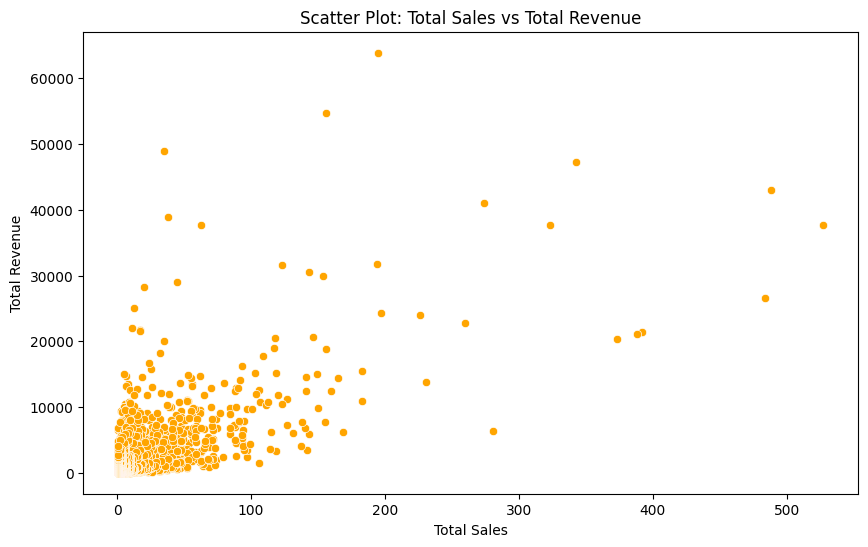

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery

# Set the correct path to your service account key file
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/wenyilee/Desktop/dsai-module-2-project-25282646cfd3.json"

# Initialize BigQuery client
client = bigquery.Client()
# Query the fact_top_selling_products table
query = """
SELECT *
FROM `dsai-module-2-project.brazilecom_facts.fact_top_selling_products`
"""
query_job = client.query(query)
results = query_job.result()

# Convert the results to a pandas DataFrame
df = results.to_dataframe()

if 'total_sales' in df.columns and 'total_revenue' in df.columns:
    # Plot the scatter plot with orange color
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='total_sales', y='total_revenue', data=df, color='orange')
    plt.title('Scatter Plot: Total Sales vs Total Revenue')
    plt.xlabel('Total Sales')
    plt.ylabel('Total Revenue')
    plt.show()
else:
    print("Columns 'total_sales' and 'total_revenue' not found. Please check the column names in your dataset.")
    print("Available columns:", df.columns)